### Import the usual suspects:

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

### Read an image from disk and display it:

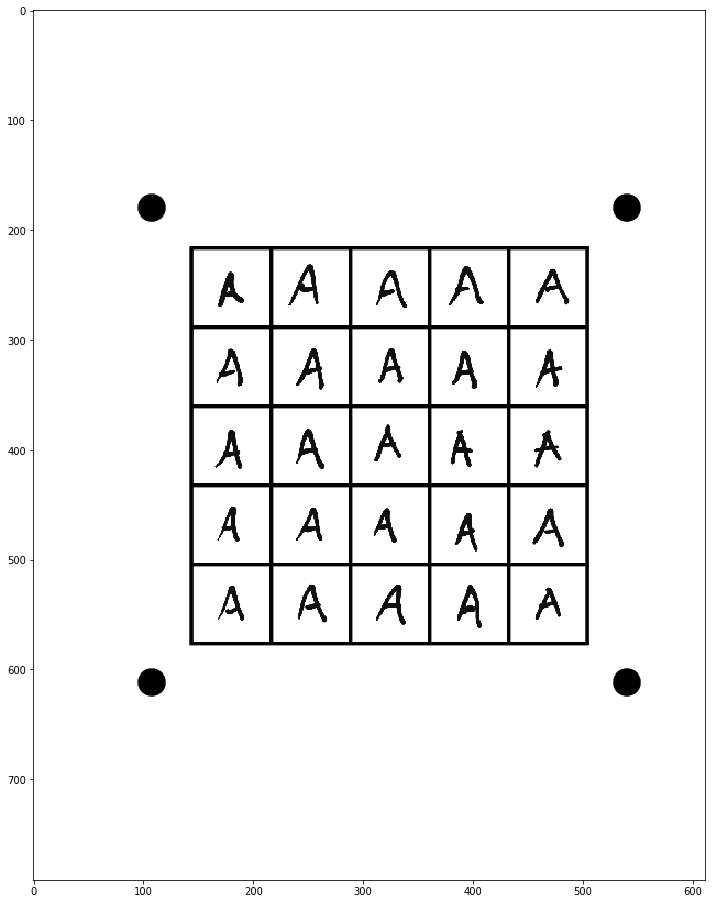

In [4]:
IMAGE='/Users/shegocaga/TDS/TDS-python-nn-18-fall/lecture_materials/2018-11-05 TDS Image Manipulation/a.png'

orig_img = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(16, 16))
plt.imshow(orig_img, cmap='gray')
plt.show()

### Create and configure the blob detector to find corner dots:

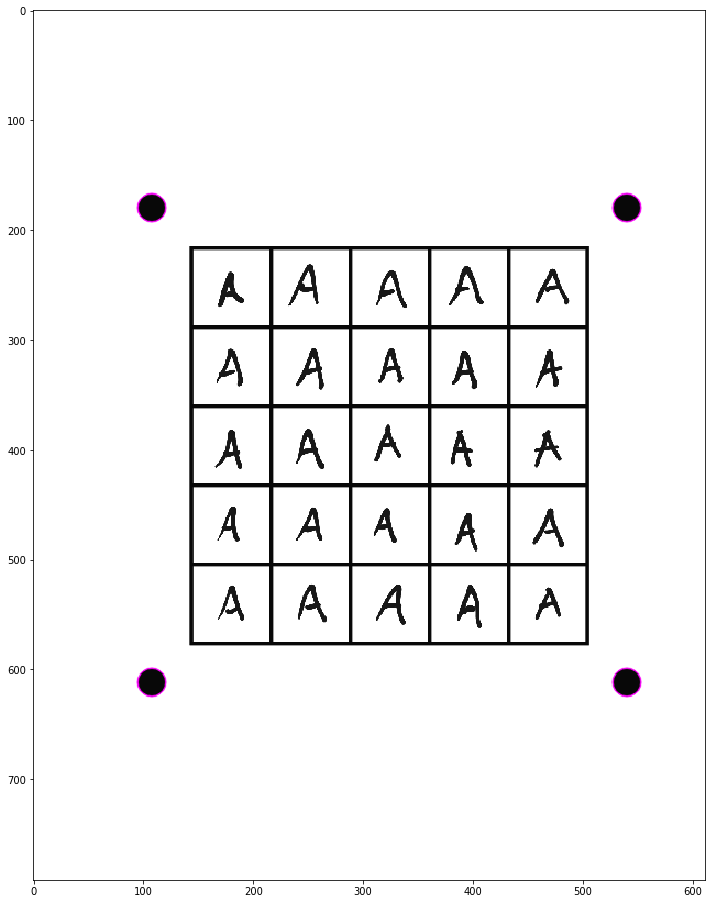

In [5]:
params = cv2.SimpleBlobDetector_Params()

# filter by filled pixel area
params.filterByArea = True
params.minArea = 250

# filter by circularity
params.filterByCircularity = True
params.minCircularity = 0.9

# deal with cv2 version differences
is_v2 = cv2.__version__.startswith('2.')
if is_v2:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

# find dots and save their locations as keypoints
keypoints = detector.detect(orig_img)

# draw the found keypoints on the image
img_kp = cv2.drawKeypoints(orig_img, keypoints, np.array([]), (255, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(16, 16))
plt.imshow(img_kp)
plt.show()

In [6]:
inpts = np.float32([[kp.pt[0], kp.pt[1]] for kp in keypoints])
print(inpts)
outpts = np.float32([[600, 600], [0, 600], [600, 0], [0, 0]])
print(outpts)

[[539.5     611.52936]
 [107.5     611.52936]
 [539.5     179.52939]
 [107.5     179.52939]]
[[600. 600.]
 [  0. 600.]
 [600.   0.]
 [  0.   0.]]


### Warp the image to square on the found keypoints:

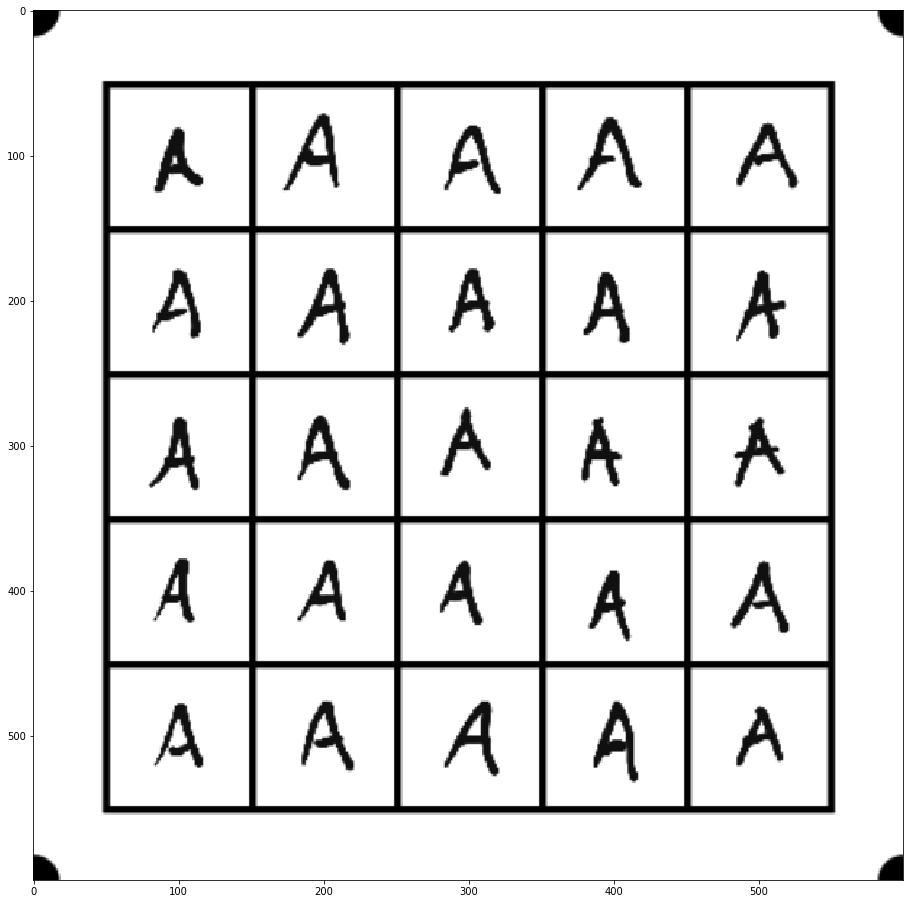

In [16]:
M = cv2.getPerspectiveTransform(inpts, outpts)
img_warp = cv2.warpPerspective(orig_img, M, (600, 600))


#img_warp = 255 - img_warp

fig = plt.figure(figsize=(16, 16))
plt.imshow(img_warp, cmap='gray')
plt.show()

### Cut along the boundary to the 5x5 grid

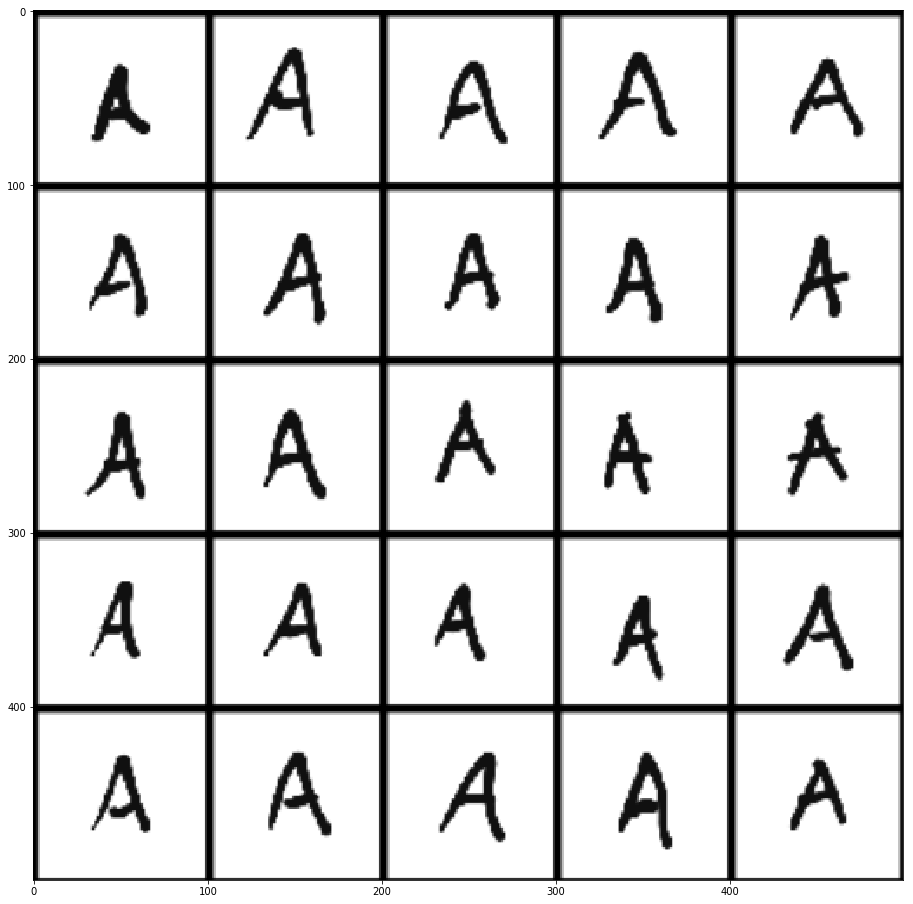

In [18]:
inpts2 = np.float32([[550,550],[50,550],[550,50],[50,50]])
outpts2 = np.float32([[500,500],[0,500],[500,0],[0,0]])
M2 = cv2.getPerspectiveTransform(inpts2, outpts2)
img_warp2 = cv2.warpPerspective(img_warp, M2, (500,500))

fig = plt.figure(figsize=(16,16))
plt.imshow(img_warp2, cmap='gray')
plt.show()

### Split the grid into 25 pieces

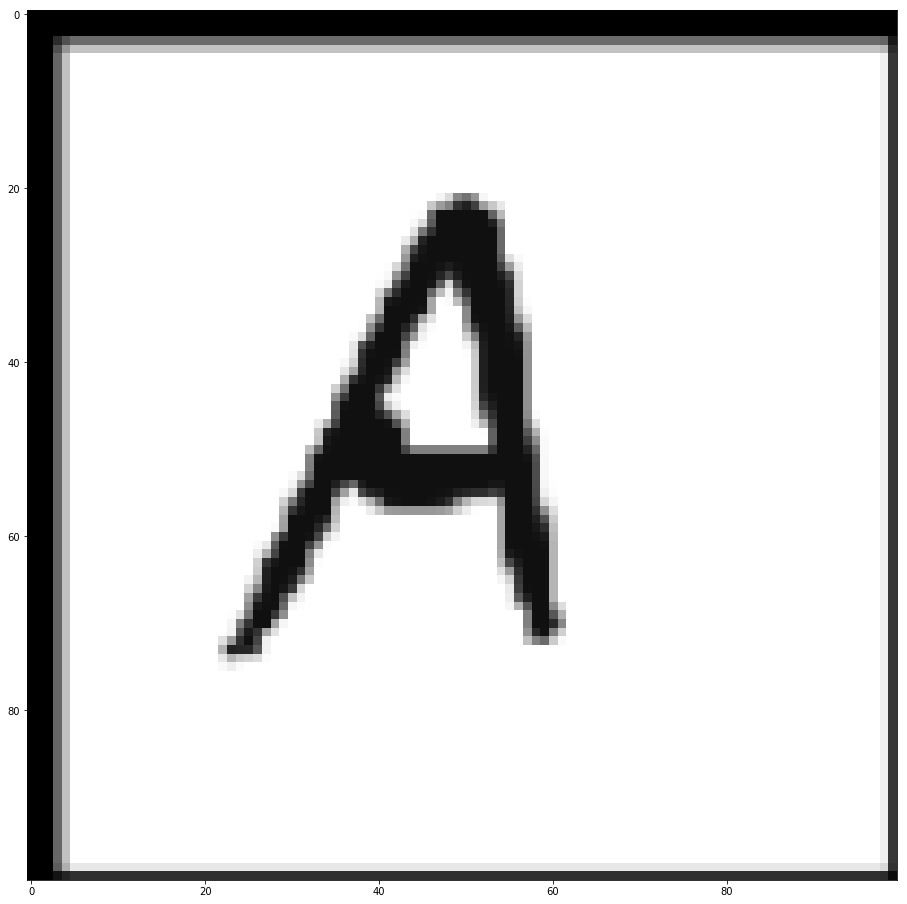

In [119]:
cells = []
cellsize = int((img_warp2.shape[0])/5)
for row in range(0,5):
    for col in range(0,5):
        cells.append(img_warp2[cellsize*row:cellsize*(row+1),cellsize*col:cellsize*(col+1)])
        
fig = plt.figure(figsize=(16,16))
plt.imshow(cells[1], cmap='gray')
plt.show()

### Resize and Center on Image to predefined size

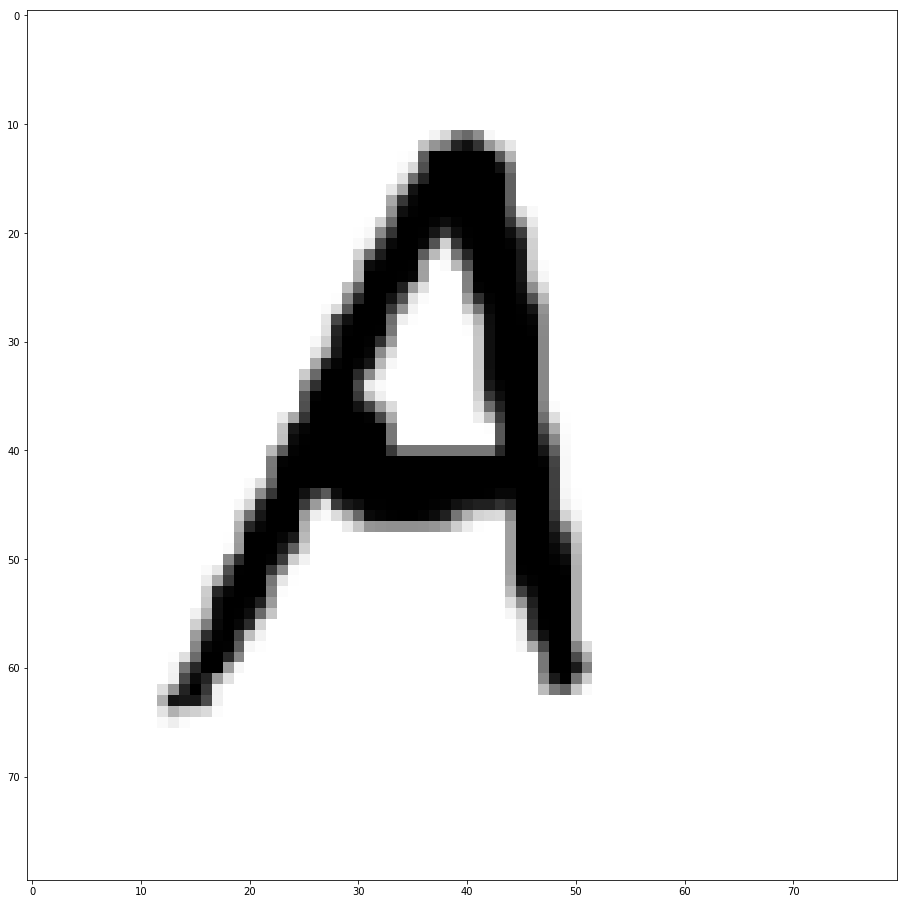

In [120]:
cells_trimmed = [cells[i][10:90,10:90] for i in range(0,25)]

fig = plt.figure(figsize=(16,16))
plt.imshow(cells_trimmed[1], cmap='gray')
plt.show()

### Resize on size of text

0 (67, 68) 67
1 (78, 77) 77
2 (78, 77) 77
3 (90, 89) 89
4 (86, 85) 85
5 (67, 68) 67
6 (71, 72) 71
7 (64, 64) 64
8 (67, 68) 67
9 (69, 69) 69
10 (69, 69) 69
11 (72, 72) 72
12 (69, 69) 69
13 (60, 60) 60
14 (69, 69) 69
15 (58, 57) 57
16 (69, 69) 69
17 (61, 61) 61
18 (61, 61) 61
19 (82, 81) 81
20 (68, 68) 68
21 (72, 72) 72
22 (76, 76) 76
23 (64, 64) 64
24 (67, 68) 67


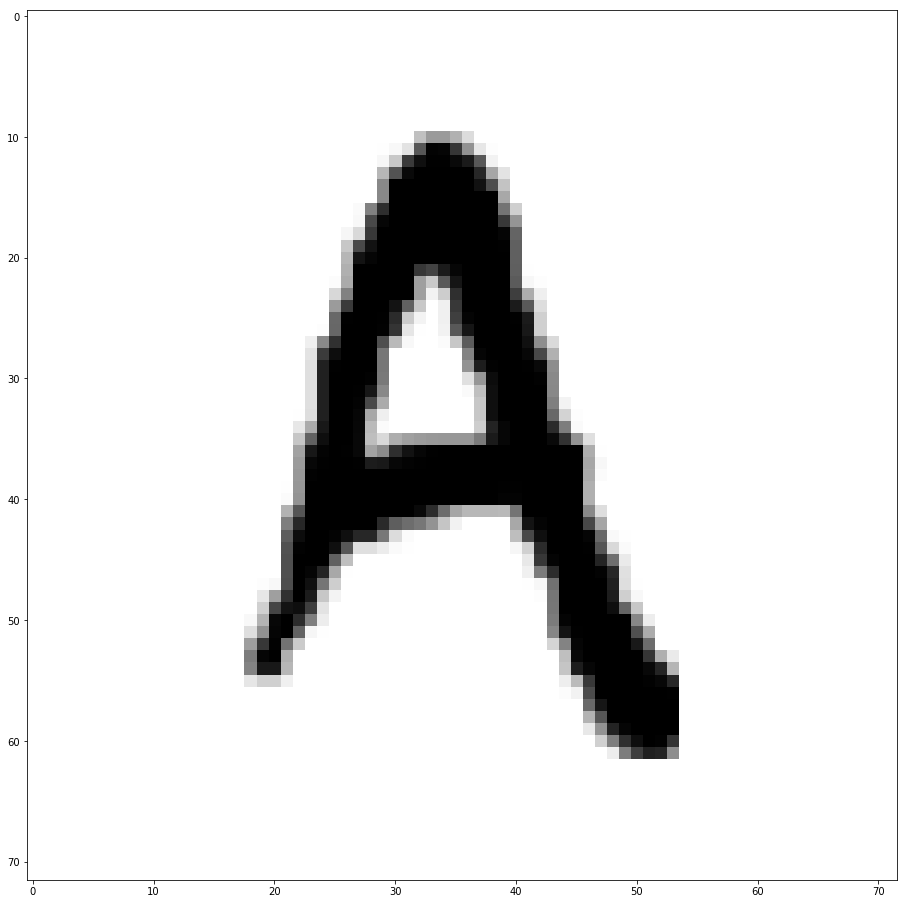

In [144]:
cells_text_normalized = []

for i in range(0,25):
    flattened_vert = cv2.reduce(cells_trimmed[i],0,rtype=3)
    top = min(np.where(flattened_vert<255)[1])
    bot = max(np.where(flattened_vert<255)[1])
    center_height = math.floor((bot+top)/2)
    height = bot - top

    flattened_horz = cv2.reduce(np.transpose(cells_trimmed[i]),0,rtype=3)
    left = min(np.where(flattened_horz<255)[1])
    right = max(np.where(flattened_horz<255)[1])
    center_width = math.floor((right+left)/2)
    width = right - left

    pad_vert = math.floor(height/2)
    pad_horz = math.floor((2*height-width)/2)

    temp = cells_trimmed[i][left:right,top:bot]
    cells_text_normalized.append(np.pad(temp,((pad_horz,pad_horz),(pad_vert,pad_vert)),'constant', constant_values=255))
    
    print(i,np.shape(cells_text_normalized[i]), min(np.shape(cells_text_normalized[i])))

fig = plt.figure(figsize=(16,16))
plt.imshow(cells_text_normalized[11], cmap='gray')
plt.show()

### Downsample to 28x28

In [158]:
np.shape(cells_text_normalized[5])[1]

for i in range(0,25):
    print(i, np.shape(cells_text_normalized[i])[1])

0 68
1 77
2 77
3 89
4 85
5 68
6 72
7 64
8 68
9 69
10 69
11 72
12 69
13 60
14 69
15 57
16 69
17 61
18 61
19 81
20 68
21 72
22 76
23 64
24 68


67 68
(28, 28)
78 77
(28, 28)
78 77
(28, 28)
90 89
(28, 28)
86 85
(28, 28)
67 68
(28, 28)
71 72
(28, 28)
64 64
(28, 28)
67 68
(28, 28)
69 69
(28, 28)
69 69
(28, 28)
72 72
(28, 28)
69 69
(28, 28)
60 60
(28, 28)
69 69
(28, 28)
58 57
(28, 28)
69 69
(28, 28)
61 61
(28, 28)
61 61
(28, 28)
82 81
(28, 28)
68 68
(28, 28)
72 72
(28, 28)
76 76
(28, 28)
64 64
(28, 28)
67 68
(28, 28)


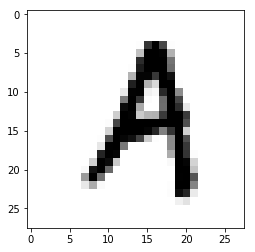

In [160]:
cells_28 = []

for i in range(0,25):
    h = np.shape(cells_text_normalized[i])[0]
    w = np.shape(cells_text_normalized[i])[1]
    print(h,w)
    inpts3 = np.float32([[h,w],[0,w],[h,0],[0,0]])
    outpts3 = np.float32([[28,28],[0,28],[28,0],[0,0]])
    M3 = cv2.getPerspectiveTransform(inpts3, outpts3)
    img_warp3 = cv2.warpPerspective(cells_text_normalized[i], M3, (28,28))
    #cells_28.append([cv2.warpPerspective(cells_trimmed[i], M3, (28,28)) for i in range(0,25)])
    cells_28.append(img_warp3)
    print(np.shape(cells_28[i]))

fig = plt.figure()
plt.imshow(cells_28[6], cmap='gray')
plt.show()

### Invert color 

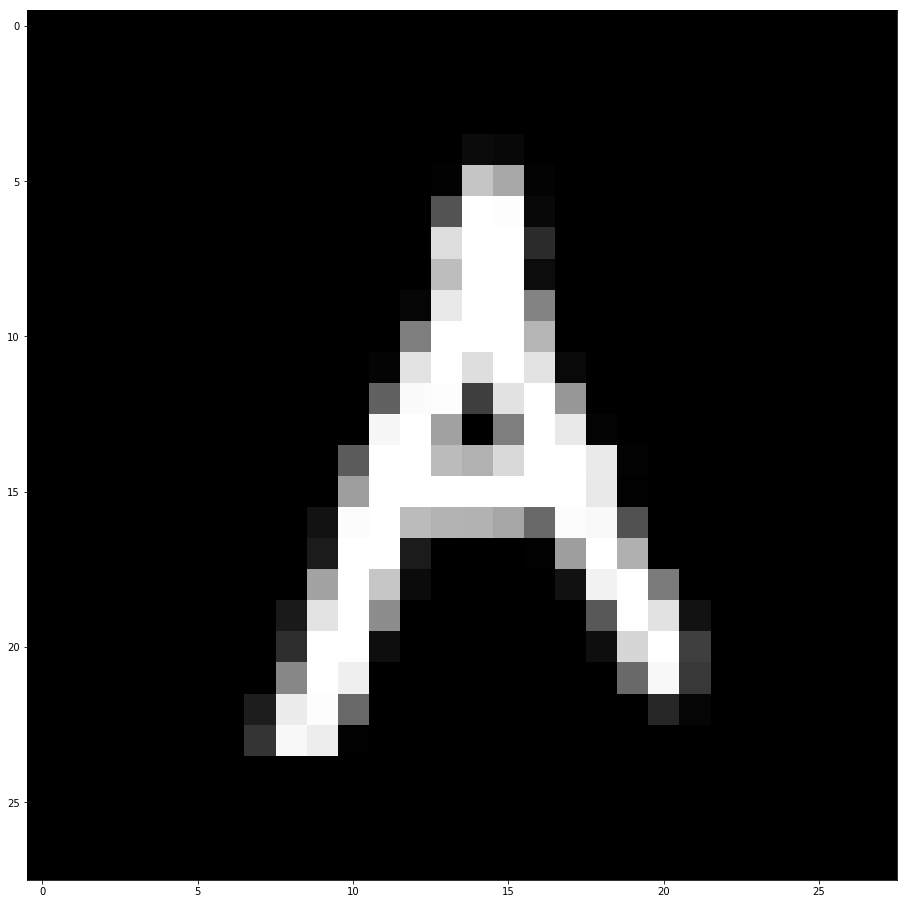

In [161]:
cells_inverted =  [cv2.bitwise_not(cells_28[i]) for i in range(0,25)]

fig = plt.figure(figsize=(16,16))
plt.imshow(cells_inverted[12], cmap='gray')
plt.show()

### Split the grid into 25 (5x5) separate images:

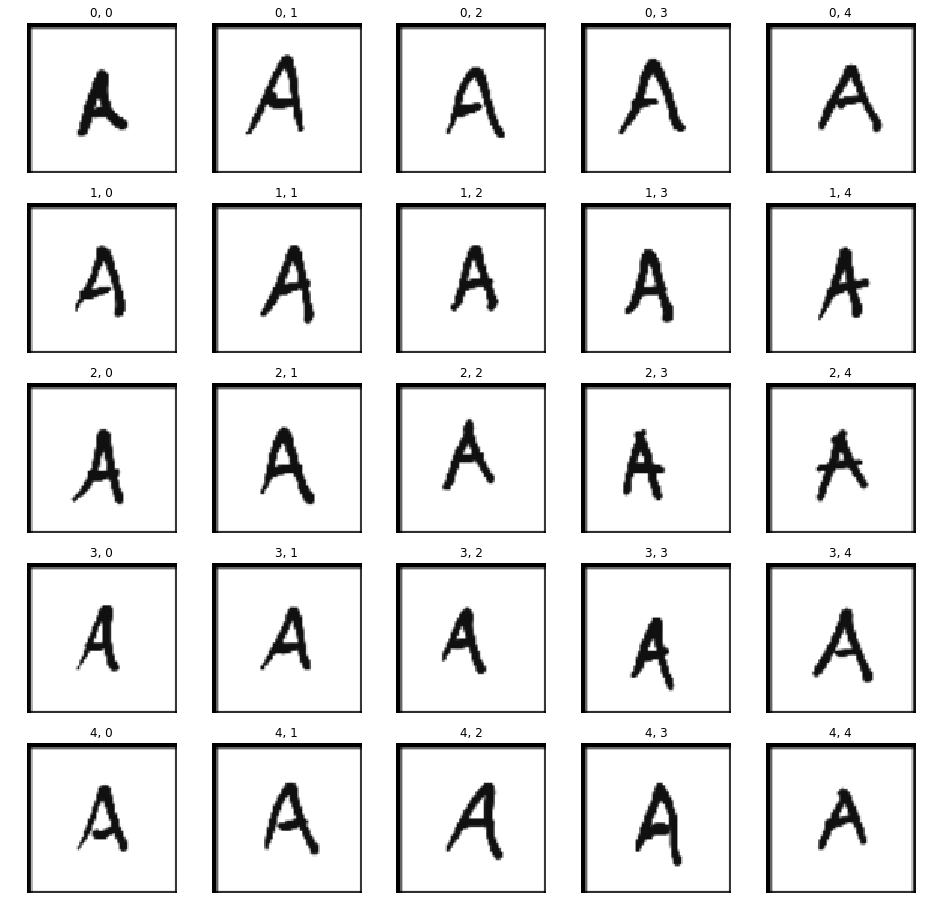

In [8]:
fig = plt.figure(figsize=(16, 16))

axes = []

cellsize = int((img_warp.shape[0]-100) / 5)
for row in range(0, 5):
    for col in range(0, 5):
        axes.append(plt.subplot2grid((5, 5), (row, col)))

cur = 0
onrow = 0
oncol = 0
for ax in axes:
    ax.axis('off')
    ax.set_title("%d, %d" % (onrow, oncol))
    ax.imshow(img_warp[50+cellsize*onrow:50+cellsize*onrow+cellsize,50+cellsize*oncol:50+cellsize*oncol+cellsize], cmap='gray')
    cur += 1
    if cur % 5 == 0:
        onrow += 1
    oncol = cur % 5

plt.show()

In [9]:
axes